In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display
import keras

# Set the seed value for experiment reproducibility.
#seed = 7
#tf.random.set_seed(seed)
#np.random.seed(seed)


In [2]:
DATASET_PATH = 'data/mini_speech_commands'
VALSET_PATH = 'data/val'
TESTSET_PATH = 'data/test'
OUTPUT_PATH = 'data/testset'

data_dir = pathlib.Path(DATASET_PATH)
val_dir = pathlib.Path(VALSET_PATH)
test_dir = pathlib.Path(TESTSET_PATH)
output_dir = pathlib.Path(OUTPUT_PATH)
'''
if not data_dir.exists():
    tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')
'''

'\nif not data_dir.exists():\n    tf.keras.utils.get_file(\n      \'mini_speech_commands.zip\',\n      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",\n      extract=True,\n      cache_dir=\'.\', cache_subdir=\'data\')\n'

In [3]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['drive' 'neutral' 'reverse' 'trunk' 'window_down']


In [4]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
valnames = tf.io.gfile.glob(str(val_dir) + '/*/*')
testnames = tf.io.gfile.glob(str(test_dir) + '/*/*')

filenames = tf.random.shuffle(filenames)

num_samples = len(filenames)
print('Number of total examples:', len(filenames))

Number of total examples: 615


In [5]:

train_files = filenames[:]
val_files = valnames[:]
test_files = testnames[:]
'''
train_files = filenames[:]
val_files = valnames[:]
test_files = testnames[:]
'''
print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 615
Validation set size 105
Test set size 55


In [6]:
test_file = tf.io.read_file(DATASET_PATH+'/drive/pcswPdrive1.wav')
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

TensorShape([16004, 1])

In [7]:
#hide

In [8]:
#hide

In [9]:
#hide

In [10]:
#hide

Tensor("strided_slice:0", shape=(), dtype=string)


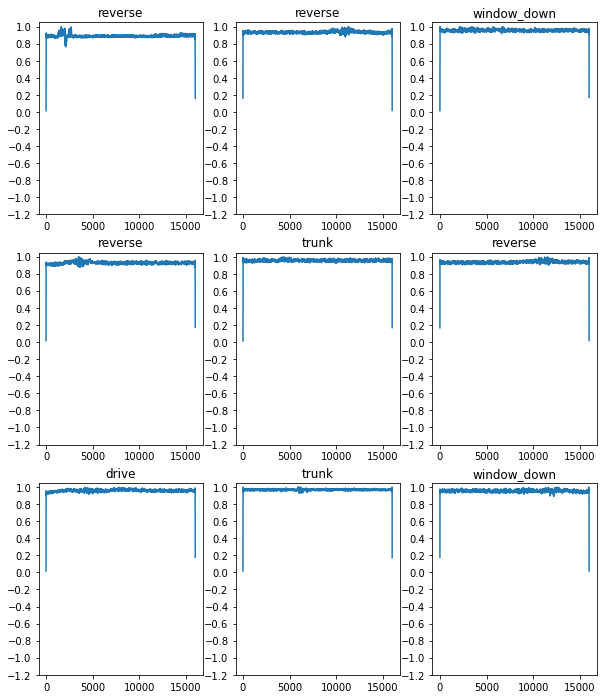

In [11]:
#hide

In [12]:
#hide

In [13]:
#hide

Label: reverse
Waveform shape: (16004,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [14]:
#hide

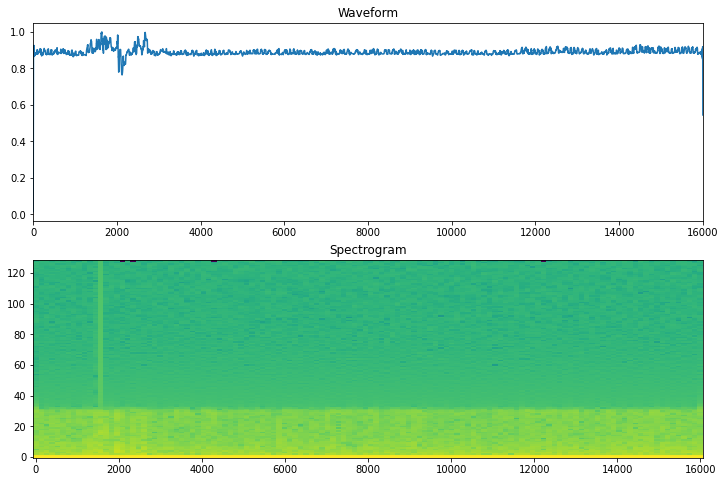

In [15]:
#hide

In [16]:
#hide

In [17]:
#hide

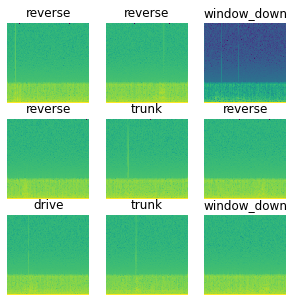

In [18]:
#hide

In [19]:
#hide

In [20]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

Tensor("strided_slice:0", shape=(), dtype=string)
Tensor("strided_slice:0", shape=(), dtype=string)


In [21]:
batch_size = 128 # 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [22]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [23]:
#hide

Input shape: (124, 129, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 64, 64, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 64, 64, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           

In [24]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

#hide

In [25]:
EPOCHS = 120
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    #callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=200,mode = 'auto',min_delta = 0.0001),
)

Epoch 1/120
5/5 [==============================] - 4s 118ms/step - loss: 1.6430 - accuracy: 0.1512 - val_loss: 1.6172 - val_accuracy: 0.1429
Epoch 2/120
5/5 [==============================] - 0s 28ms/step - loss: 1.6242 - accuracy: 0.1951 - val_loss: 1.6133 - val_accuracy: 0.1429
Epoch 3/120
5/5 [==============================] - 0s 27ms/step - loss: 1.6166 - accuracy: 0.2065 - val_loss: 1.6116 - val_accuracy: 0.1429
Epoch 4/120
5/5 [==============================] - 0s 27ms/step - loss: 1.6140 - accuracy: 0.2130 - val_loss: 1.6168 - val_accuracy: 0.1429
Epoch 5/120
5/5 [==============================] - 0s 27ms/step - loss: 1.6245 - accuracy: 0.2146 - val_loss: 1.6170 - val_accuracy: 0.1429
Epoch 6/120
5/5 [==============================] - 0s 27ms/step - loss: 1.6215 - accuracy: 0.2081 - val_loss: 1.6206 - val_accuracy: 0.1429
Epoch 7/120
5/5 [==============================] - 0s 28ms/step - loss: 1.6202 - accuracy: 0.1886 - val_loss: 1.6344 - val_accuracy: 0.0952
Epoch 8/120
5/5 [==

5/5 [==============================] - 0s 27ms/step - loss: 1.1744 - accuracy: 0.5268 - val_loss: 1.4921 - val_accuracy: 0.3714
Epoch 118/120
5/5 [==============================] - 0s 27ms/step - loss: 1.1541 - accuracy: 0.5545 - val_loss: 1.5209 - val_accuracy: 0.3905
Epoch 119/120
5/5 [==============================] - 0s 29ms/step - loss: 1.1832 - accuracy: 0.5122 - val_loss: 1.4591 - val_accuracy: 0.4571
Epoch 120/120
5/5 [==============================] - 0s 28ms/step - loss: 1.1618 - accuracy: 0.5366 - val_loss: 1.5085 - val_accuracy: 0.3619


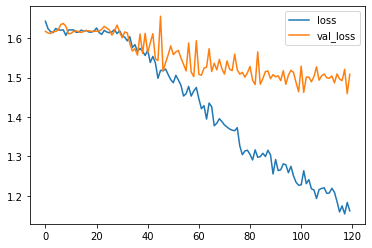

In [26]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'] , metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [27]:
test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [28]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 91%


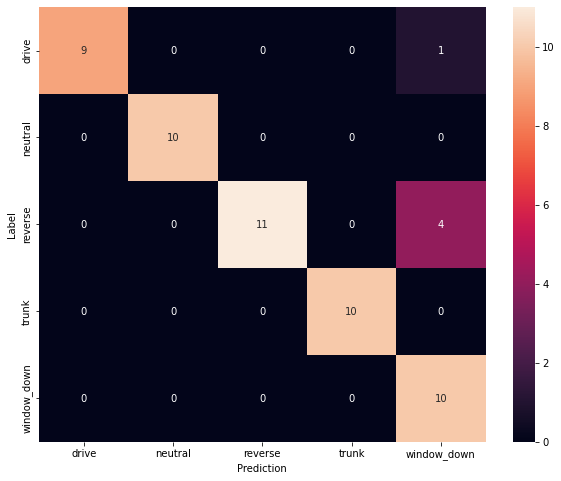

5/5 [==============================] - 0s 8ms/step - loss: 1.1072 - accuracy: 0.8488


[1.1072241067886353, 0.8487805128097534]

In [29]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

model.evaluate(train_ds, batch_size= 32)

Tensor("strided_slice:0", shape=(), dtype=string)


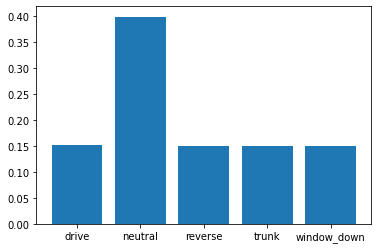

neutral


In [36]:

sample_file = output_dir/'result/pkjhPneutral2.csv.wav'
#sample_file = test_dir/'result/psup2Pheater4.csv.wav'

sample_ds = preprocess_dataset([str(sample_file)])

for spectrogram, label in sample_ds.batch(1):
    prediction = model.predict(spectrogram,batch_size = 64)

    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.show()

'''

#DATASET_PATH = 'data/mini_speech_commands'
#VALSET_PATH = 'data/val'
#TESTSET_PATH = 'data/testset'

#data_dir = pathlib.Path(DATASET_PATH)
#val_dir = pathlib.Path(VALSET_PATH)
#test_dir = pathlib.Path(TESTSET_PATH)

PRE_PATH = 'result/'
presamplePath = pathlib.Path(PRE_PATH)
#filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
presample = tf.io.gfile.glob(str(presamplePath) + '/*/*')

sample_file = presamplePath/'close/newdatasetPwindowup4.csv.wav'
sample_ds = preprocess_dataset([str(sample_file)])

print(sample_ds)

sample_ds = preprocess_dataset([str(sample_file)])
for spectrogram, label in sample_ds.batch(1):
    prediction = model.predict(sample_file)
    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.title(f'Predictions for "{commands[label[0]]}"')
    plt.show()

print(commands)
print(prediction)

'''
if np.argmax(prediction) == 0:
    print("close")
elif np.argmax(prediction) == 1:
    print("drive")
elif np.argmax(prediction) == 2:
    print("heater")
elif np.argmax(prediction) == 3:
    print("left")
elif np.argmax(prediction) == 4:
    print("neutral")
elif np.argmax(prediction) == 5:
    print("open")
elif np.argmax(prediction) == 6:
    print("parking")
elif np.argmax(prediction) == 7:
    print("reverse")
elif np.argmax(prediction) == 8:
    print("right")
elif np.argmax(prediction) == 9:
    print("stop")
elif np.argmax(prediction) == 10:
    print("trunk")
elif np.argmax(prediction) == 11:
    print("window_down")
elif np.argmax(prediction) == 12:
    print("window_up")
elif np.argmax(prediction) == 13:
    print("wiper")

In [31]:
from keras.models import load_model

model.save('wordclassification.h5')

In [32]:
#hide

<function get_label at 0x0000021D0323FA68>


In [33]:
#hide

['drive' 'neutral' 'reverse' 'trunk' 'window_down']
